### Module 1: Case Study-II : Predictive Maintenance Data set
### Attribute Information

- The dataset consists of 10,000 data points stored as rows with 14 features in columns  
- UID: unique identifier ranging from 1 to 10000  
- Product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number  
- Air temperature K: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K  
- Process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.  
- Rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise  
- Torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.  
- Tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a  'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.  
  
The machine failure consists of five independent failure modes  :
1. tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).  
2. heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.  
3. power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.  
4. oversdf failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.  
5. random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.  
  
If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail

### Loading Various Libraries

In [22]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import collections
warnings.filterwarnings('ignore')

### Read Data From CSV File

In [69]:
df=pd.read_csv('C:/Users/USER/Documents/DSB Assignments/Module 1/ai4i2020.csv',header=0)

### I. Exploratory Data Analysis

In [13]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [14]:
# Basic stats and structure of data
print('Total Number of Elements: ', df.size)
print('Rows x Columns: ',df.shape)
print("Columns: ",df.columns)
display(df.info())

Total Number of Elements:  140000
Rows x Columns:  (10000, 14)
Columns:  Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000

None

In [20]:
df[[df.columns[2]]].value_counts()

Type
L       6000
M       2997
H       1003
dtype: int64

#### EDA: Column Types
**High Cardinatilty Columns**: UDI, Product ID  
  
**Categorical Columns**: Type  
  
**Continuous Columns**: Air Temp, Process Temp, Rotational Speed, Torque, Tool Wear  
  
**Binary Encoded**: Machine Failure, TWF, HDF, PWF, OSF, RNF  

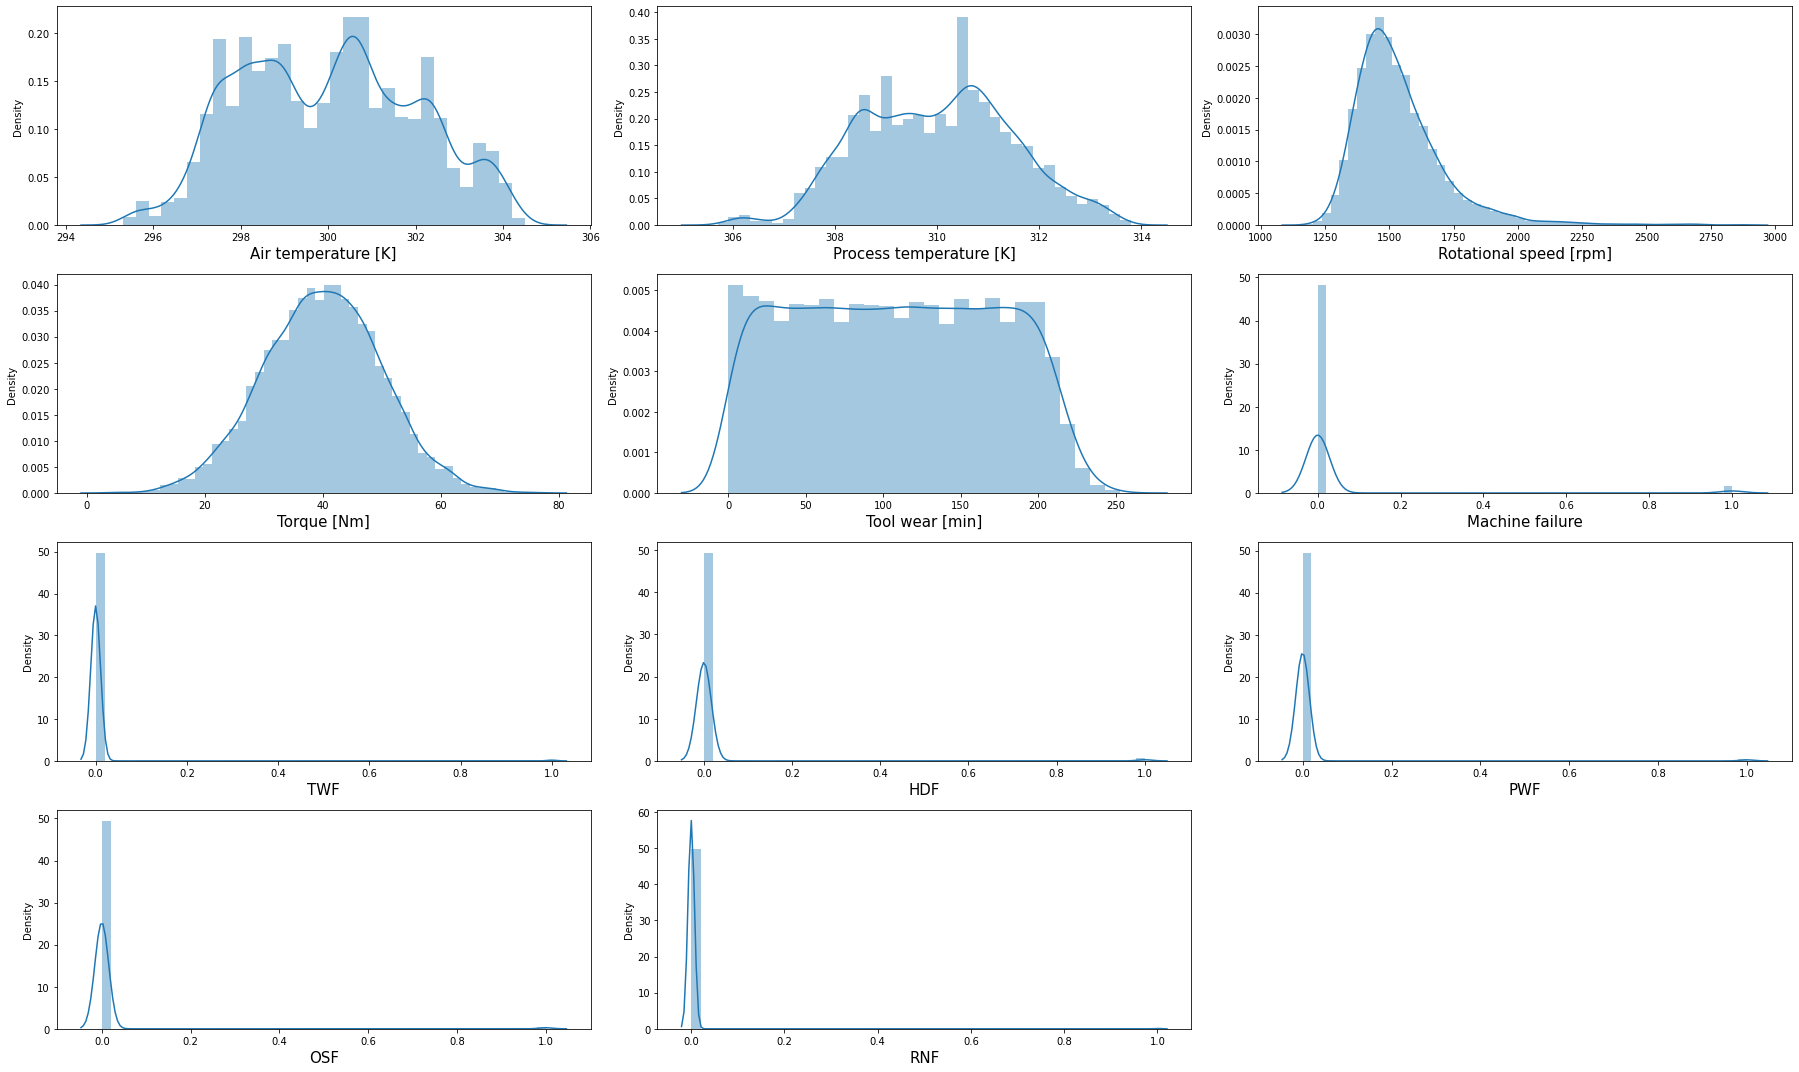

In [28]:
plt.figure(figsize = (25, 15))
plotnumber = 1

for column in df.columns[3:]:
    if plotnumber <= len(df.columns):
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

### Univariate Analysis For All Features

#### Univariate Analysis: Scatter Plot

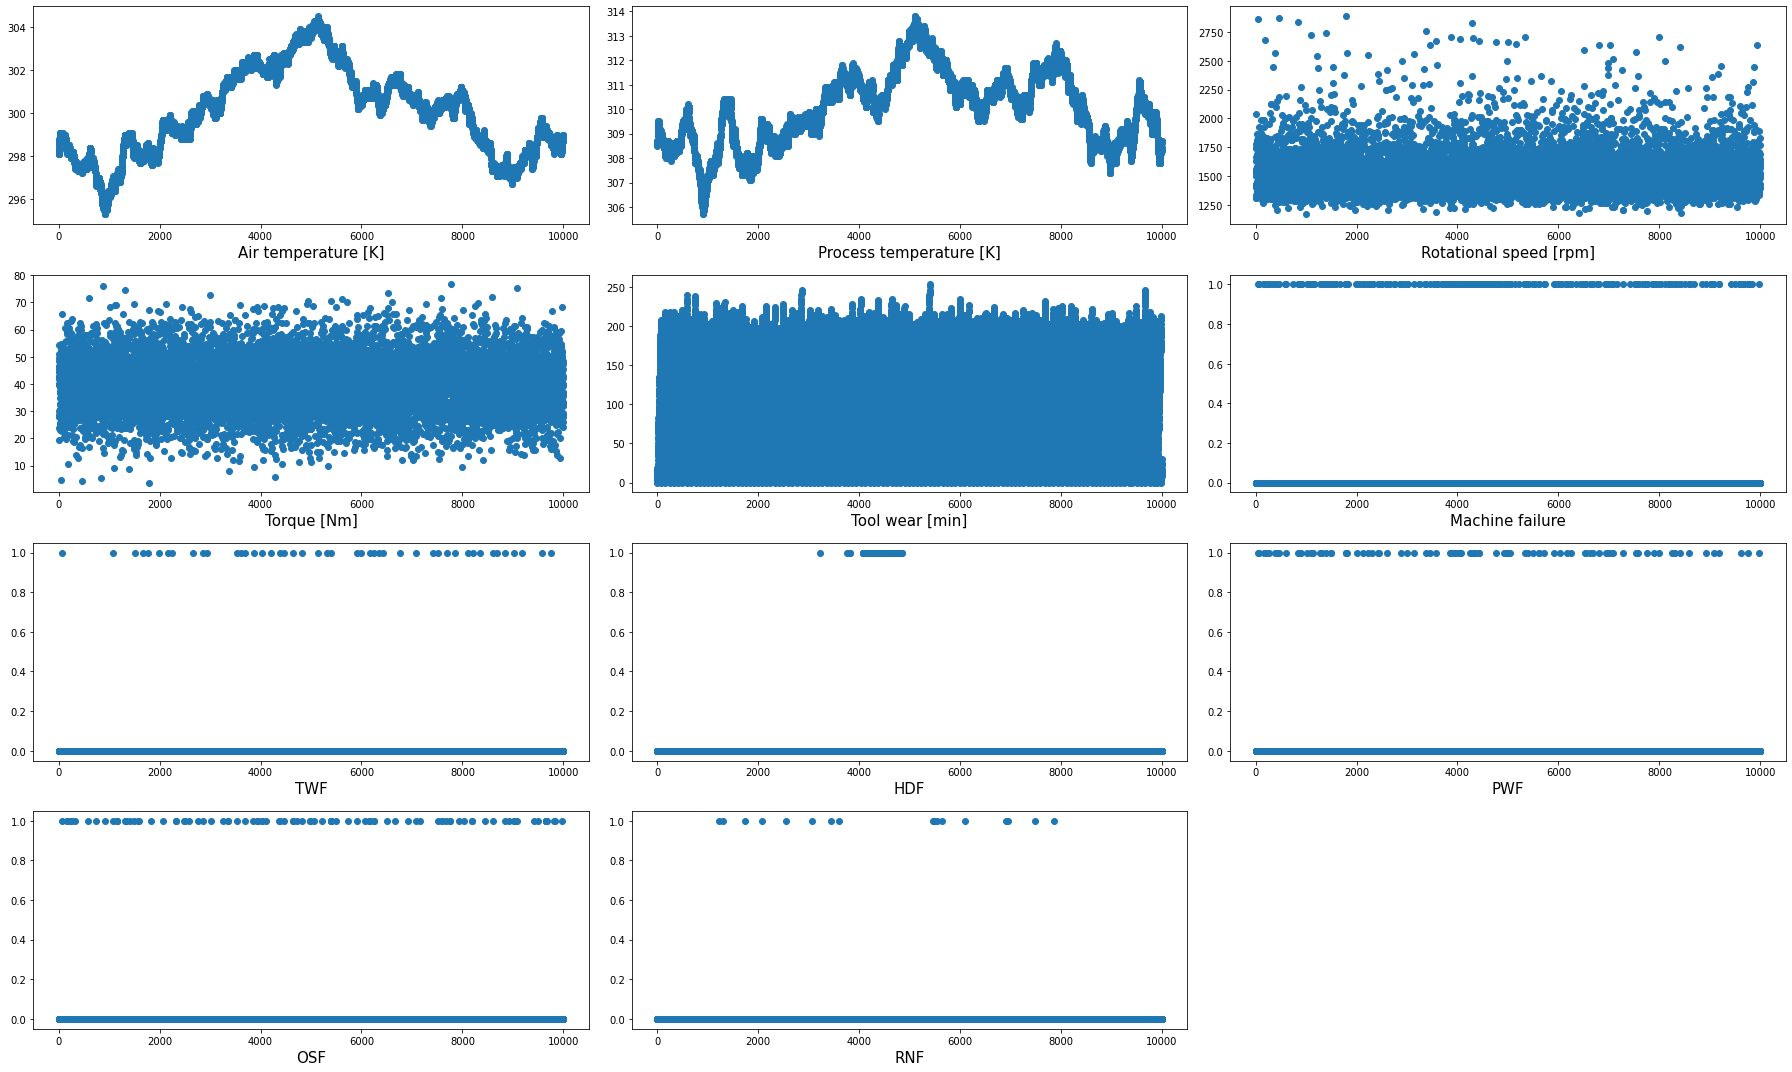

In [29]:
plt.figure(figsize = (25, 15))
plotnumber = 1

for column in df.columns[3:]:
    if plotnumber <= len(df.columns):
        ax = plt.subplot(4,3, plotnumber)
        plt.scatter(df.index,df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

#### Univariate Analysis: Histogram

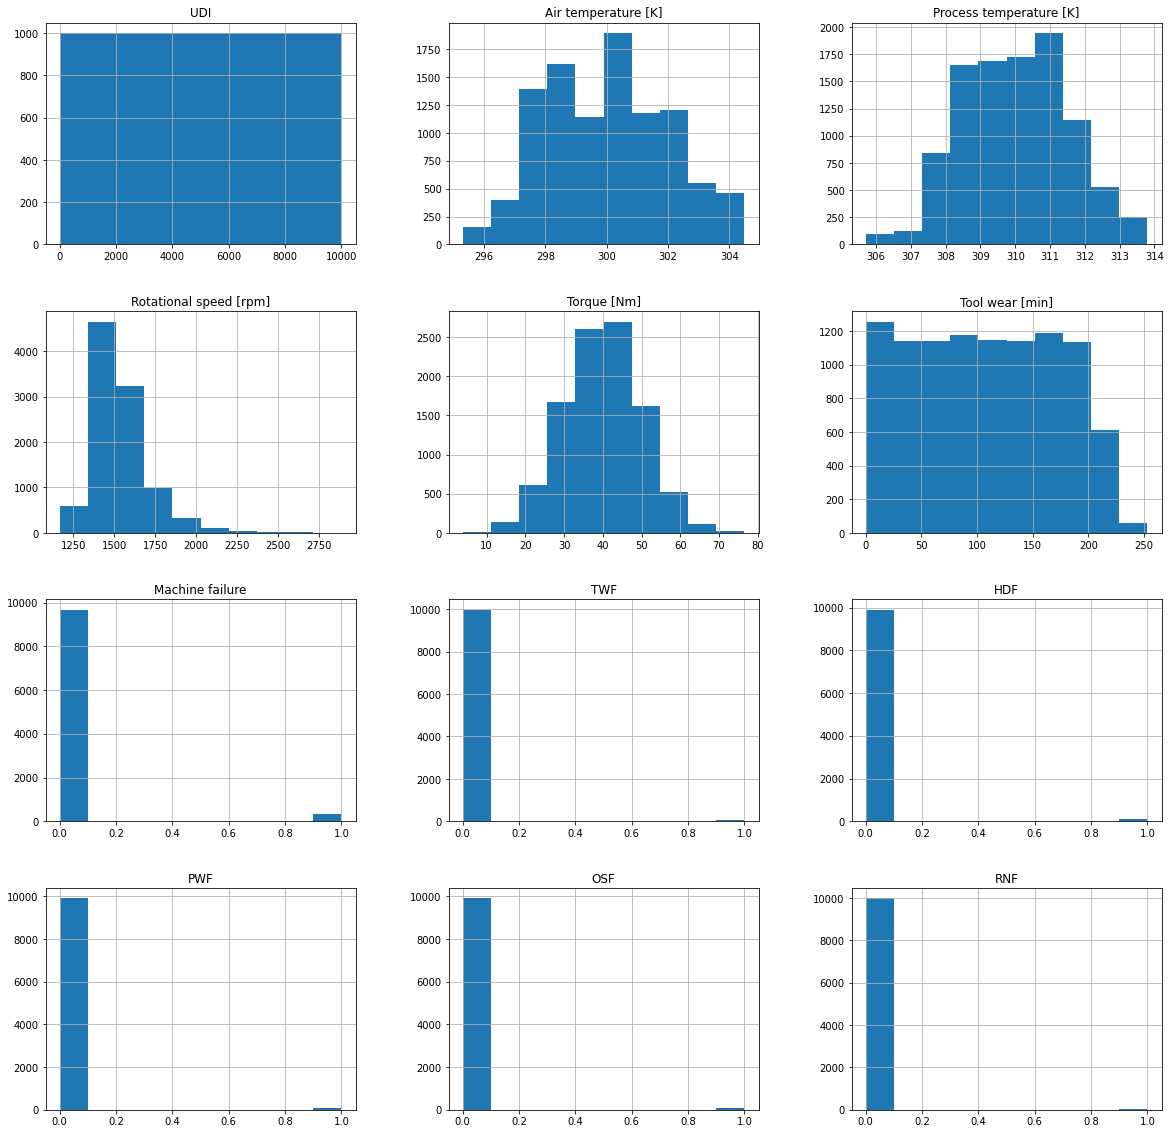

In [31]:
df.hist(figsize=(20,20))
plt.show()

#### Univariate Analysis: Univariate Statistics

In [34]:
for column in df.columns[4:]:
    print('Feature:', column)
    print('Mean: ',df[column].mean())
    print('Median: ',df[column].median())
    print('Mode: ',df[column].mode())
    print('Std: ',df[column].mode())
    print('Min: ',df[column].min())
    print('Max: ',df[column].max())
    print('Q1:',df[column].quantile(0.25))
    print('Q3:',df[column].quantile(0.75))
    print('IQR:',df[column].quantile(0.75)-df[column].quantile(0.25))
    print('Value count:', df[column].value_counts())
    print('-------------------------------------------')

Feature: Process temperature [K]
Mean:  310.00556
Median:  310.1
Mode:  0    310.6
dtype: float64
Std:  0    310.6
dtype: float64
Min:  305.7
Max:  313.8
Q1: 308.8
Q3: 311.1
IQR: 2.3000000000000114
Value count: 310.6    317
310.8    273
310.7    266
308.6    265
310.5    263
        ... 
306.9      4
313.7      4
305.8      3
305.7      2
313.8      2
Name: Process temperature [K], Length: 82, dtype: int64
-------------------------------------------
Feature: Rotational speed [rpm]
Mean:  1538.7761
Median:  1503.0
Mode:  0    1452
dtype: int64
Std:  0    1452
dtype: int64
Min:  1168
Max:  2886
Q1: 1423.0
Q3: 1612.0
IQR: 189.0
Value count: 1452    48
1435    43
1447    42
1429    40
1469    40
        ..
2197     1
2211     1
1905     1
1893     1
2450     1
Name: Rotational speed [rpm], Length: 941, dtype: int64
-------------------------------------------
Feature: Torque [Nm]
Mean:  39.986909999999995
Median:  40.1
Mode:  0    40.2
dtype: float64
Std:  0    40.2
dtype: float64
Min:  3.8

#### Univariate Analysis: Various Metrics

In [36]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### Bivariate Analysis

<AxesSubplot:>

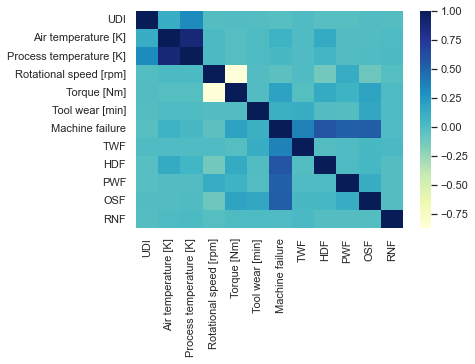

In [37]:
# print(train.corr())
sns.set(font_scale=1.0)
sns.heatmap(df.corr(),cbar=True,annot=False,cmap='YlGnBu')

### Missing Value Treatment
#### Checking for Missing Values

We see that the data is complete without any missing values. This can be visually observed as well from the heatamp. So no missing value treatment i.e columns need to be dropped or values imputed.

In [56]:
# Shows number of missing values in each column
df.isnull().sum()
# Shows Only Columsn with Missing Values
df.columns[df.isnull().any()]

Index([], dtype='object')

<AxesSubplot:>

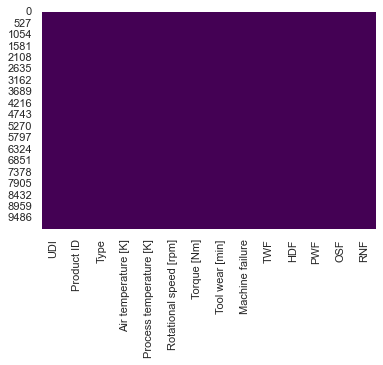

In [57]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

### Outlier Treatment

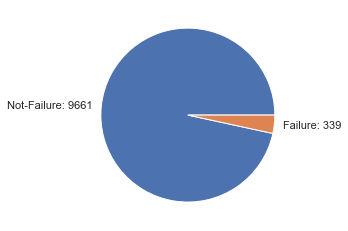

% of Failures 3.508953524479867


In [72]:
# import matplotlib.pyplot as plt
# import numpy as np
notFailed =  df['Machine failure'].value_counts()[0]
failed = df['Machine failure'].value_counts()[1]
y = np.array([df['Machine failure'].value_counts()[0],df['Machine failure'].value_counts()[1]])
mylabels = ["Not-Failure: "+str(df['Machine failure'].value_counts()[0]), "Failure: "+ str(df['Machine failure'].value_counts()[1])]
plt.pie(y,labels = mylabels)
plt.show() 
print('% of Failures', (failed/notFailed)*100 )

We'll remove any observations that is not in the range  
$Q1 - 1.5*IQR < x < Q3 + 1.5*IQR$

-------
Columns Name: Air temperature [K]
Non-Outlier Range: 293.5 , 306.29999999999995
Initial Size: 140000
Final Size: 140000
-------
-------
Columns Name: Process temperature [K]
Non-Outlier Range: 305.35 , 314.55000000000007
Initial Size: 140000
Final Size: 140000
-------
-------
Columns Name: Rotational speed [rpm]
Non-Outlier Range: 1139.5 , 1895.5
Initial Size: 140000
Final Size: 134148
-------
-------
Columns Name: Torque [Nm]
Non-Outlier Range: 14.850000000000005 , 66.45
Initial Size: 134148
Final Size: 133490
-------
-------
Columns Name: Tool wear [min]
Non-Outlier Range: -110.5 , 325.5
Initial Size: 133490
Final Size: 133490
-------


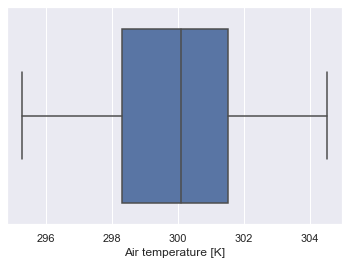

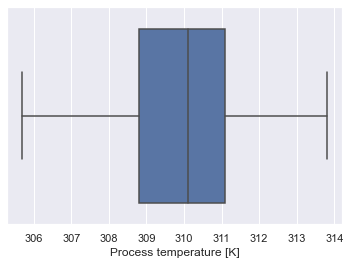

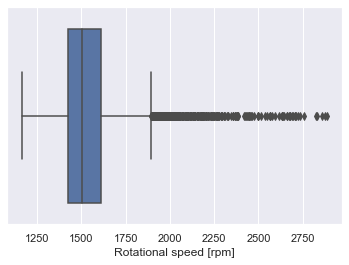

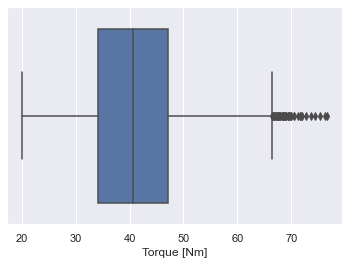

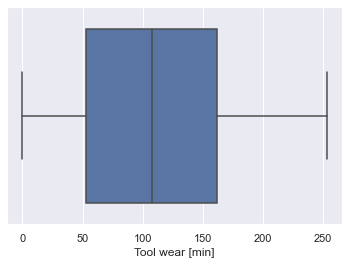

In [73]:
columnsToRemoveOutliers = ['Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]']

for i,column in enumerate(columnsToRemoveOutliers):
    # column = train.columns[0]
    plt.figure(i)
    sns.boxplot(x=df[column])
    lowerRange = df[column].quantile(0.25)-1.5*(df[column].quantile(0.75)-df[column].quantile(0.25))
    upperRange = df[column].quantile(0.75)+1.5*(df[column].quantile(0.75)-df[column].quantile(0.25))
    # lowerRange = train[column].mean() - 30*(train[column].std())
    # upperRange = train[column].mean() + 30*(train[column].std())
    # plt.scatter(train.index,train[column])
    # plt.xlabel(column)
    # plt.show()
    print('-------')
    print('Columns Name:',column)
    print("Non-Outlier Range:",lowerRange,',',upperRange)
    print("Initial Size:",df.size)
    df = df[(df[column]<upperRange) & (df[column]>lowerRange)]
    print("Final Size:",df.size)
    print('-------')
    # plt.scatter(train.index,train[column])
    # plt.xlabel(column)
    # plt.show()

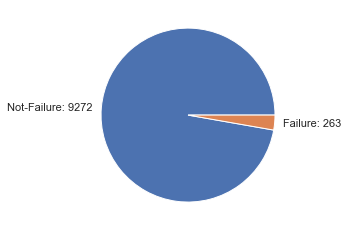

% of Failures 3.508953524479867


In [74]:
# import matplotlib.pyplot as plt
# import numpy as np
y = np.array([df['Machine failure'].value_counts()[0],df['Machine failure'].value_counts()[1]])
mylabels = ["Not-Failure: "+str(df['Machine failure'].value_counts()[0]), "Failure: "+ str(df['Machine failure'].value_counts()[1])]
plt.pie(y,labels = mylabels)
plt.show() 
print('% of Failures', (failed/notFailed)*100 )

### Feature Engineering
#### Dropping Columns with High Cardinality

In [75]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [76]:
df = df.drop(['UDI', 'Product ID'], axis=1)

#### Selecting Columns For Logistic Regression

Removing Columns for machine failure as well as other failure columns

In [77]:
regressionColumns = [i for i in df.columns if i not in ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF']]
print(regressionColumns)

['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
